# 데이터분석 3조
    2020년 주유소 유류 판매가격 데이터를 분석하여
    소비자 입장에서 유용한 유류비용 정보를 제공
    
    소비자 입장에서 가질 수 있는 질문을 생각해보고
    그에 대한 답변을 데이터로부터 구함
    
    조원 : 권예람, 김형근, 오영수, 이수영, 정우철
    

### 목차
    1) 데이터 전처리
    2) Q1. 주유소가 밀집된 지역은 가격이 낮을까?
    4) Q2. 셀프주유소와 일반주유소 중 어디가 더 저렴할까?
    5) Q3. 지역에 따라 월별 가격변동폭이 다를까?
    6) Q4. 알뜰주유소와 알뜰주유소가 아닌 주유소 중 어디가 얼마나 저렴할까?
    7) Q5. 지역별로 가장 저렴한 브랜드, 제일 비싼 브랜드는 무엇일까?

### 1) 데이터 전처리
    
    상반기, 하반기 데이터를 각각 first, second에 담고
    Nan값을 제거 후 concat을 사용하여 두 데이터를 합친다
    

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [3]:
# 상반기 주유소 판매 데이터 불러오기
first = pd.read_csv('../data/2020년 상반기 주유소 판매가격.csv', encoding='CP949')
first = first.dropna()
first

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 01월,SK에너지,셀프,1802.00,1657.00,1495.00,0.0
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 02월,SK에너지,셀프,1795.38,1637.97,1483.97,0.0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 03월,SK에너지,셀프,1741.26,1570.61,1431.13,0.0
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 04월,SK에너지,셀프,1617.00,1425.33,1290.00,0.0
5,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 05월,SK에너지,셀프,1565.00,1350.81,1197.74,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2990,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 02월,SK에너지,셀프,1872.93,1542.14,1365.55,0.0
2991,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 03월,SK에너지,셀프,1798.10,1479.32,1278.87,0.0
2992,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 04월,SK에너지,셀프,1652.93,1322.80,1128.67,0.0
2993,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 05월,SK에너지,셀프,1593.19,1252.55,1058.48,0.0


In [4]:
# 하반기 주유소 판매 데이터 불러오기
second = pd.read_csv('../data/2020년 하반기 주유소 판매가격.csv', encoding='CP949')
second = second.dropna()
second

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 07월,SK에너지,셀프,1635.0,1435.00,1265.00,0.0
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 08월,SK에너지,셀프,1635.0,1435.00,1265.00,0.0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 09월,SK에너지,셀프,1635.0,1435.00,1265.00,0.0
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 10월,SK에너지,셀프,1635.0,1435.00,1265.00,0.0
5,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 11월,SK에너지,셀프,1635.0,1415.67,1245.67,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2946,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 08월,현대오일뱅크,셀프,1598.0,1402.65,1211.10,0.0
2947,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 09월,현대오일뱅크,셀프,1598.0,1393.00,1203.00,0.0
2948,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 10월,현대오일뱅크,셀프,1598.0,1338.42,1148.42,0.0
2949,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 11월,현대오일뱅크,셀프,1598.0,1292.00,1092.37,0.0


In [5]:
# 데이터 결합
df = pd.concat([first, second], ignore_index=True)
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 01월,SK에너지,셀프,1802.00,1657.00,1495.00,0.0
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 02월,SK에너지,셀프,1795.38,1637.97,1483.97,0.0
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 03월,SK에너지,셀프,1741.26,1570.61,1431.13,0.0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 04월,SK에너지,셀프,1617.00,1425.33,1290.00,0.0
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 05월,SK에너지,셀프,1565.00,1350.81,1197.74,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5939,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 08월,현대오일뱅크,셀프,1598.00,1402.65,1211.10,0.0
5940,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 09월,현대오일뱅크,셀프,1598.00,1393.00,1203.00,0.0
5941,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 10월,현대오일뱅크,셀프,1598.00,1338.42,1148.42,0.0
5942,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 11월,현대오일뱅크,셀프,1598.00,1292.00,1092.37,0.0


In [6]:
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 01월,SK에너지,셀프,1802.00,1657.00,1495.00,0.0
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 02월,SK에너지,셀프,1795.38,1637.97,1483.97,0.0
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 03월,SK에너지,셀프,1741.26,1570.61,1431.13,0.0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 04월,SK에너지,셀프,1617.00,1425.33,1290.00,0.0
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 05월,SK에너지,셀프,1565.00,1350.81,1197.74,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5939,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 08월,현대오일뱅크,셀프,1598.00,1402.65,1211.10,0.0
5940,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 09월,현대오일뱅크,셀프,1598.00,1393.00,1203.00,0.0
5941,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 10월,현대오일뱅크,셀프,1598.00,1338.42,1148.42,0.0
5942,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 11월,현대오일뱅크,셀프,1598.00,1292.00,1092.37,0.0


## Q1. 주유소가 밀집된 지역은 가격이 낮을까?


#### 지역별 주유소 분포

In [7]:
#지역 컬럼의 고유값 조회
df['지역'].unique()

array(['서울 강남구', '서울 강동구', '서울 강북구', '서울 강서구', '서울 관악구', '서울 광진구',
       '서울 구로구', '서울 금천구', '서울 노원구', '서울 도봉구', '서울 동대문구', '서울 동작구',
       '서울 마포구', '서울 서대문구', '서울 서초구', '서울 성동구', '서울 성북구', '서울 송파구',
       '서울 양천구', '서울 영등포구', '서울 용산구', '서울 은평구', '서울 종로구', '서울 중구',
       '서울 중랑구'], dtype=object)

In [8]:
# 시와 구로 나눠서 컬럼 추가하고, 시 컬럼의 서울을 서울특별시로 변경
df['시'] = [add.split()[0] for add in df['지역']]
df['구'] = [add.split()[1] for add in df['지역']]
df.loc[df['시']=='서울', '시'] = '서울특별시'
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 01월,SK에너지,셀프,1802.00,1657.00,1495.00,0.0,서울특별시,강남구
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 02월,SK에너지,셀프,1795.38,1637.97,1483.97,0.0,서울특별시,강남구
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 03월,SK에너지,셀프,1741.26,1570.61,1431.13,0.0,서울특별시,강남구
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 04월,SK에너지,셀프,1617.00,1425.33,1290.00,0.0,서울특별시,강남구
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 05월,SK에너지,셀프,1565.00,1350.81,1197.74,0.0,서울특별시,강남구


In [9]:
df['구'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [10]:
# 주유소 상호 중복 값 제거
region = df.drop_duplicates(['상호'])
region

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 01월,SK에너지,셀프,1802.00,1657.00,1495.00,0.00,서울특별시,강남구
6,A0000525,서울 강남구,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2020년 01월,GS칼텍스,일반,2289.00,1999.00,1903.65,1358.74,서울특별시,강남구
12,A0001219,서울 강남구,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),2020년 01월,SK에너지,셀프,0.00,1539.52,1379.52,0.00,서울특별시,강남구
18,A0009061,서울 강남구,(주)선진도곡주유소,서울 강남구 도곡로 162 (도곡동),2020년 01월,S-OIL,일반,1790.00,1641.45,1499.00,0.00,서울특별시,강남구
24,A0001217,서울 강남구,(주)소모에너지엔테크놀러지 쎈트럴주유소,서울 강남구 삼성로 335,2020년 01월,GS칼텍스,일반,2146.19,1996.84,1816.29,1356.29,서울특별시,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964,A0010081,서울 중랑구,용마로주유소,서울 중랑구 용마산로 309 (면목동),2020년 01월,SK에너지,셀프,0.00,1554.35,1384.35,1100.00,서울특별시,중랑구
2970,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우동),2020년 01월,GS칼텍스,셀프,0.00,1538.10,1363.26,0.00,서울특별시,중랑구
2976,A0009220,서울 중랑구,재원에너지㈜ 범아주유소,서울 중랑구 동일로 881 (묵동),2020년 01월,S-OIL,일반,0.00,1558.00,1398.00,1090.00,서울특별시,중랑구
2982,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,2020년 01월,GS칼텍스,셀프,0.00,1543.55,1392.55,1100.00,서울특별시,중랑구


In [11]:
# 지역별 주유소 수를 데이터프레임으로 출력
region_cnt = region['구'].value_counts().rename_axis('구').reset_index(name='주유소 수')
region_cnt

,구,주유소 수
0,강남구,40
1,서초구,36
2,강서구,34
3,송파구,32
4,영등포구,32
5,양천구,25
6,성북구,23
7,구로구,22
8,동대문구,21
9,도봉구,18


#### 지역별 주유소 가격 평균

In [12]:
# 0값 제외해서 테이블 불러오기
df2 = df.replace(0, np.nan)
df2

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 01월,SK에너지,셀프,1802.00,1657.00,1495.00,NaN,서울특별시,강남구
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 02월,SK에너지,셀프,1795.38,1637.97,1483.97,NaN,서울특별시,강남구
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 03월,SK에너지,셀프,1741.26,1570.61,1431.13,NaN,서울특별시,강남구
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 04월,SK에너지,셀프,1617.00,1425.33,1290.00,NaN,서울특별시,강남구
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 05월,SK에너지,셀프,1565.00,1350.81,1197.74,NaN,서울특별시,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5939,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 08월,현대오일뱅크,셀프,1598.00,1402.65,1211.10,NaN,서울특별시,중랑구
5940,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 09월,현대오일뱅크,셀프,1598.00,1393.00,1203.00,NaN,서울특별시,중랑구
5941,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 10월,현대오일뱅크,셀프,1598.00,1338.42,1148.42,NaN,서울특별시,중랑구
5942,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 11월,현대오일뱅크,셀프,1598.00,1292.00,1092.37,NaN,서울특별시,중랑구


In [13]:
# 지역별, 유종별 평균 가격 계산
region_avg = df2.pivot_table(index=['구'], values=['고급휘발유', '휘발유', '경유', '실내등유'], aggfunc='mean').round(2)
region_avg

,경유,고급휘발유,실내등유,휘발유
구,,,,
강남구,1426.83,1820.58,1250.74,1601.45
강동구,1297.85,1742.76,1082.45,1483.32
강북구,1168.33,1740.84,942.14,1358.06
강서구,1218.80,1616.75,1068.25,1407.98
관악구,1266.05,1678.79,1087.53,1440.76
광진구,1202.65,1633.34,1065.07,1397.08
구로구,1226.03,1588.16,1070.56,1429.09
금천구,1196.91,1533.02,1065.28,1390.48
노원구,1246.63,1661.30,1066.44,1434.36


#### 시각화를 위한 지역별 주유소 수, 지역별 평균가격 데이터프레임 좌우 병합

In [14]:
df_merge = pd.merge(region_cnt, region_avg, on=['구'])
df_merge

,구,주유소 수,경유,고급휘발유,실내등유,휘발유
0,강남구,40,1426.83,1820.58,1250.74,1601.45
1,서초구,36,1324.34,1712.04,1155.36,1490.59
2,강서구,34,1218.80,1616.75,1068.25,1407.98
3,송파구,32,1242.61,1595.92,1125.37,1423.96
4,영등포구,32,1313.36,1804.25,1122.86,1497.84
5,양천구,25,1209.96,1637.81,1083.69,1401.76
6,성북구,23,1173.99,1666.20,1034.43,1362.38
7,구로구,22,1226.03,1588.16,1070.56,1429.09
8,동대문구,21,1215.94,1616.75,1088.62,1408.67
9,도봉구,18,1190.66,1669.42,993.69,1378.40


#### 데이터 시각화

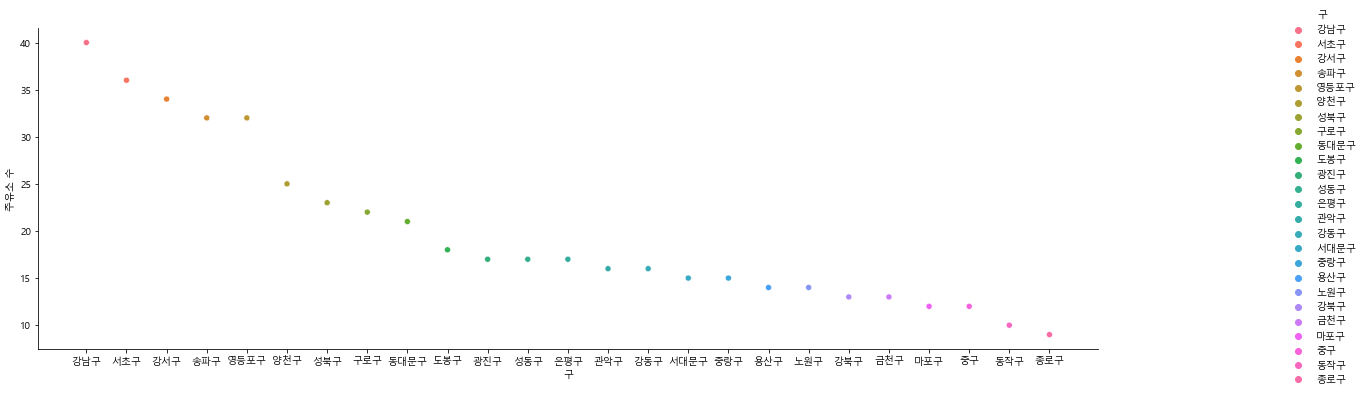

In [15]:
# 지역 분포 데이터 시각화
g = sns.relplot(x="구", y="주유소 수", hue='구', data=region_cnt)
g.fig.set_figwidth(20)
g.fig.set_figheight(5)

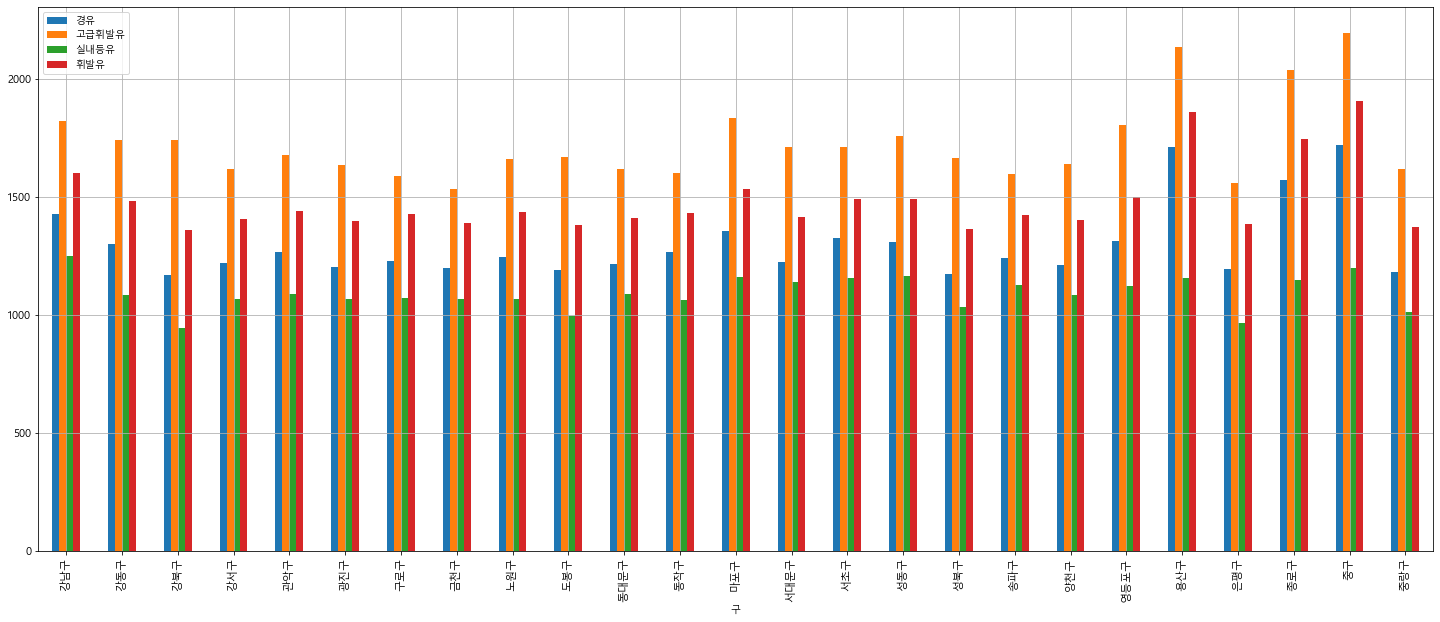

In [16]:
# 지역별 평균 가격 시각화
region_avg.plot(kind='bar', 
                figsize=(25, 10), 
                width=0.5,
                fontsize=11).grid()

#### 경유 평균가격

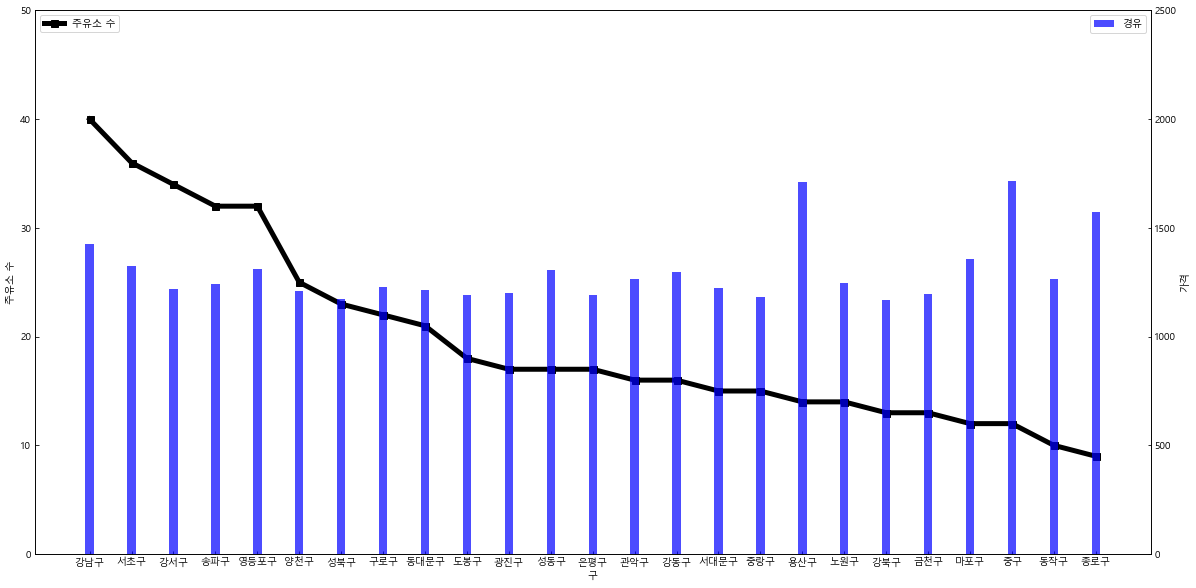

In [17]:
df_merge

x = df_merge['구'].to_list()
y1 = df_merge['주유소 수'].to_list()
y2 = df_merge['경유'].to_list()
y3 = df_merge['휘발유'].to_list()
y4 = df_merge['고급휘발유'].to_list()
y5 = df_merge['실내등유'].to_list()

# 그래프 그리기
plt.rcParams["figure.figsize"] = (20,10)
fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='black', markersize=7, linewidth=5, alpha=1, label='주유소 수')
ax1.set_ylim(0, 50)
ax1.set_xlabel('구')
ax1.set_ylabel('주유소 수')
ax1.tick_params(axis='both', direction='in')

plt.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.bar(x, y2, color='b', label='경유', alpha=0.7, width=0.2)
ax2.set_ylim(0, 2500)
ax2.set_ylabel('가격')
ax2.tick_params(axis='y', direction='in')

plt.legend(loc='upper right')
plt.show()

#### 휘발유 평균가격

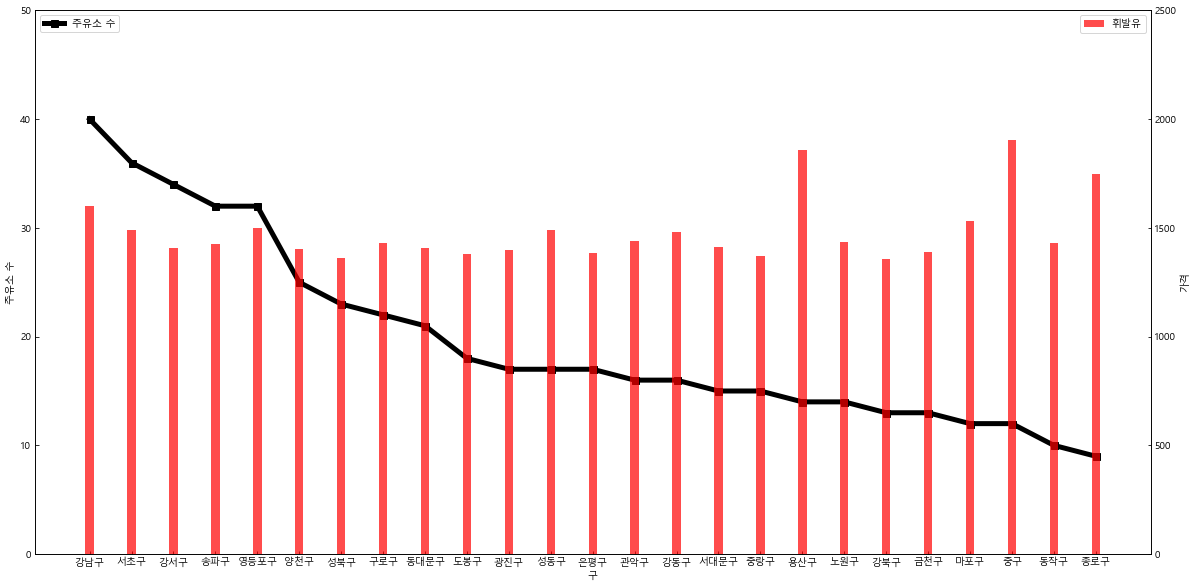

In [18]:
# 그래프 그리기
plt.rcParams["figure.figsize"] = (20,10)
fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='black', markersize=7, linewidth=5, alpha=1, label='주유소 수')
ax1.set_ylim(0, 50)
ax1.set_xlabel('구')
ax1.set_ylabel('주유소 수')
ax1.tick_params(axis='both', direction='in')

plt.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.bar(x, y3, color='r', label='휘발유', alpha=0.7, width=0.2)
ax2.set_ylim(0, 2500)
ax2.set_ylabel('가격')
ax2.tick_params(axis='y', direction='in')

plt.legend(loc='upper right')
plt.show()

#### 고급휘발유 평균가격

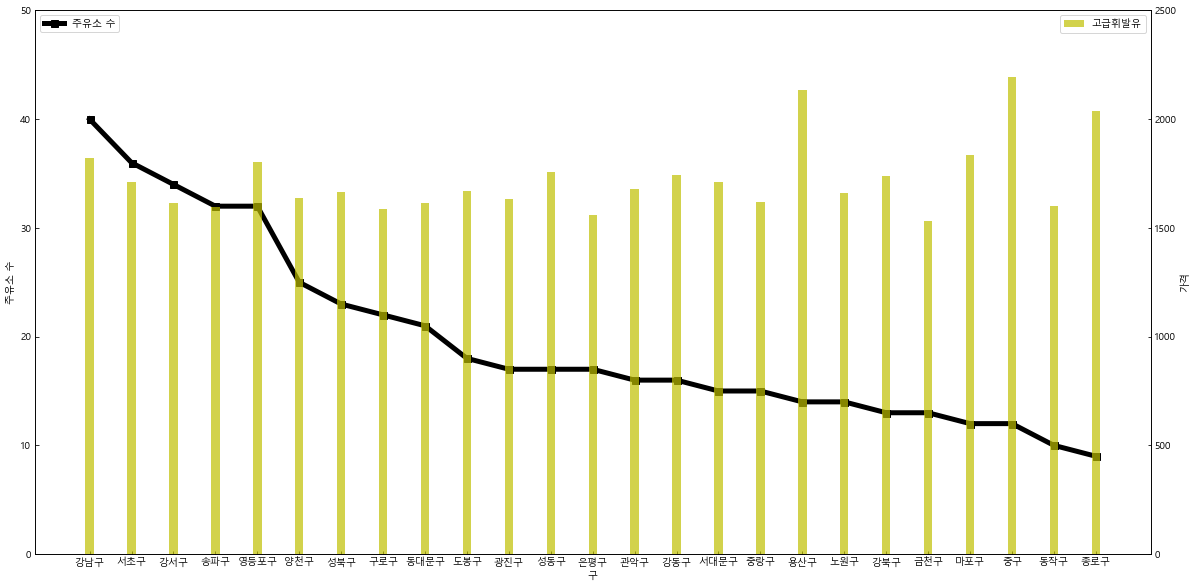

In [19]:
# 그래프 그리기
plt.rcParams["figure.figsize"] = (20,10)
fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='black', markersize=7, linewidth=5, alpha=1, label='주유소 수')
ax1.set_ylim(0, 50)
ax1.set_xlabel('구')
ax1.set_ylabel('주유소 수')
ax1.tick_params(axis='both', direction='in')

plt.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.bar(x, y4, color='y', label='고급휘발유', alpha=0.7, width=0.2)
ax2.set_ylim(0, 2500)
ax2.set_ylabel('가격')
ax2.tick_params(axis='y', direction='in')

plt.legend(loc='upper right')
plt.show()

#### 실내등유 평균가격

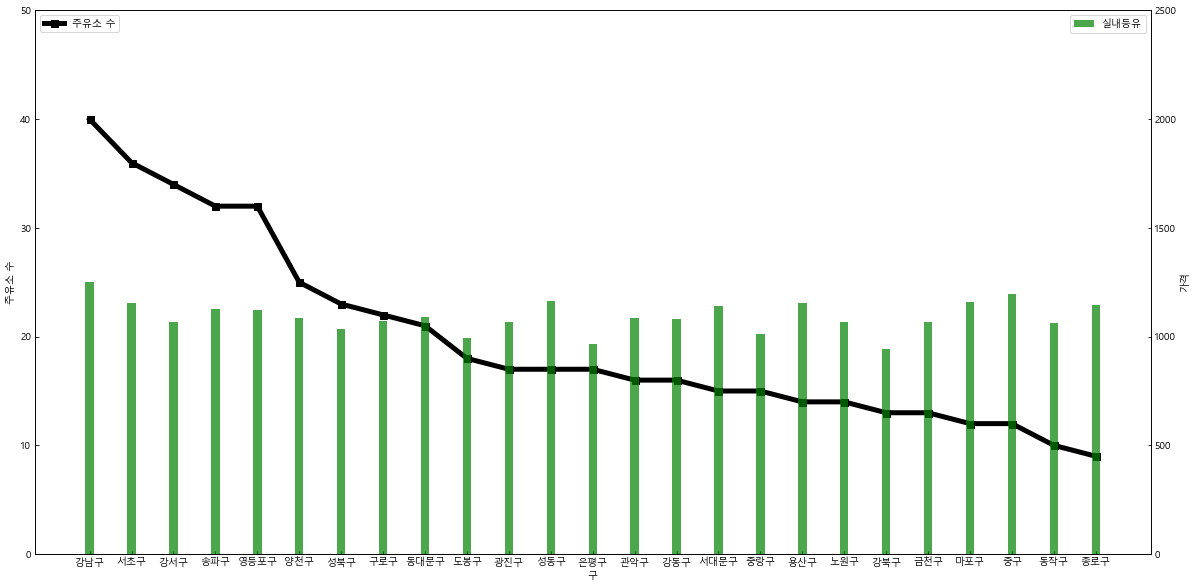

In [20]:
# 그래프 그리기
plt.rcParams["figure.figsize"] = (20,10)
fig, ax1 = plt.subplots()

ax1.plot(x, y1, '-s', color='black', markersize=7, linewidth=5, alpha=1, label='주유소 수')
ax1.set_ylim(0, 50)
ax1.set_xlabel('구')
ax1.set_ylabel('주유소 수')
ax1.tick_params(axis='both', direction='in')

plt.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.bar(x, y5, color='g', label='실내등유', alpha=0.7, width=0.2)
ax2.set_ylim(0, 2500)
ax2.set_ylabel('가격')
ax2.tick_params(axis='y', direction='in')

plt.legend(loc='upper right')
plt.show()

### 결과 도출
    주유소 밀집도에 따라 유류 가격에 차이가 있을 것으로 예상하였으나, 주유소 밀집도 보다는 다른 요인(예를 들어 주거지역/업무지역)에 의해 가격이 결정된다는 결론을 얻을 수 있었다
    

## Q2. 셀프주유소와 일반주유소 중 어디가 더 저렴할까?
    
    '셀프여부'를 기준으로 groupby함수를 사용하여 평균 휘발유, 경유 가격을 도출

In [21]:
self_mean= df.groupby(['셀프여부'])[['휘발유','경유']].agg(['mean'])

In [22]:
self_mean

,휘발유,경유
,mean,mean
셀프여부,,
셀프,1393.649771,1206.151583
일반,1535.092848,1354.116410


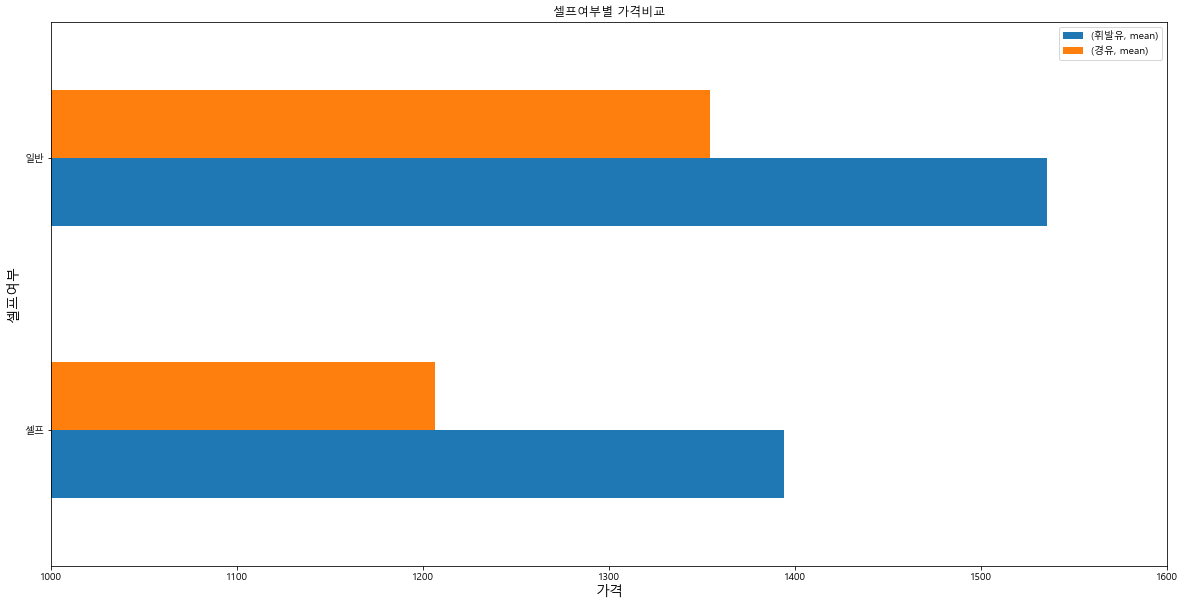

In [23]:
self_mean.plot(kind='barh')
plt.title("셀프여부별 가격비교")
plt.xlabel("가격", fontsize=14)
plt.ylabel("셀프여부", fontsize=14)
plt.legend()
plt.xlim(1000,1600)
plt.show()

### 결과 도출
    
    휘발유, 경유 모두 셀프 주유소가 일반 주유소보다 리터당 약 150원 저렴하게 판매함을 알 수있다. 저렴하게 유류 구입을 원한다면 셀프 주유소에 방문하는 것을 통해 유류비 절감을 할 수 있다.

## Q3. 지역에 따라 월별 가격변동폭이 다를까?
    

In [24]:
df['지역']=df['주소'].str.split(' ').str[1]
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구
0,A0006039,강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 01월,SK에너지,셀프,1802.00,1657.00,1495.00,0.0,서울특별시,강남구
1,A0006039,강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 02월,SK에너지,셀프,1795.38,1637.97,1483.97,0.0,서울특별시,강남구
2,A0006039,강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 03월,SK에너지,셀프,1741.26,1570.61,1431.13,0.0,서울특별시,강남구
3,A0006039,강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 04월,SK에너지,셀프,1617.00,1425.33,1290.00,0.0,서울특별시,강남구
4,A0006039,강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 05월,SK에너지,셀프,1565.00,1350.81,1197.74,0.0,서울특별시,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5939,A0009197,중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 08월,현대오일뱅크,셀프,1598.00,1402.65,1211.10,0.0,서울특별시,중랑구
5940,A0009197,중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 09월,현대오일뱅크,셀프,1598.00,1393.00,1203.00,0.0,서울특별시,중랑구
5941,A0009197,중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 10월,현대오일뱅크,셀프,1598.00,1338.42,1148.42,0.0,서울특별시,중랑구
5942,A0009197,중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 11월,현대오일뱅크,셀프,1598.00,1292.00,1092.37,0.0,서울특별시,중랑구


In [25]:
gu_byeol = round(df.groupby(['지역', '기간']).agg(['mean']), 2)
gu_byeol.drop(['고급휘발유', '실내등유'], axis=1, inplace=True)
print(gu_byeol.head(50))

                   휘발유       경유
                  mean     mean
지역  기간                         
강남구 2020년 01월  1771.25  1620.02
    2020년 02월  1754.09  1600.69
    2020년 03월  1703.36  1545.26
    2020년 04월  1580.07  1418.17
    2020년 05월  1504.06  1335.51
    2020년 06월  1540.89  1362.34
    2020년 07월  1569.83  1386.12
    2020년 08월  1574.32  1391.87
    2020년 09월  1554.38  1368.83
    2020년 10월  1550.47  1362.24
    2020년 11월  1543.17  1351.52
    2020년 12월  1564.31  1369.69
강동구 2020년 01월  1646.62  1493.89
    2020년 02월  1618.86  1458.30
    2020년 03월  1556.32  1380.02
    2020년 04월  1419.26  1237.57
    2020년 05월  1355.56  1168.05
    2020년 06월  1423.03  1233.44
    2020년 07월  1466.50  1272.94
    2020년 08월  1472.66  1277.33
    2020년 09월  1475.31  1279.71
    2020년 10월  1455.62  1259.09
    2020년 11월  1442.69  1245.28
    2020년 12월  1467.39  1268.53
강북구 2020년 01월  1538.20  1381.26
    2020년 02월  1513.65  1350.89
    2020년 03월  1438.35  1256.47
    2020년 04월  1270.59  1075.01
    2020

In [26]:
# gu_byeol.reset_index(inplace=True)
# gu_byeol

gu_byeol_max = gu_byeol.groupby(['지역']).max()[['휘발유', '경유']]
print(gu_byeol_max)
gu_byeol_min = gu_byeol.groupby(['지역']).min()[['휘발유', '경유']]
print(gu_byeol_min)
# gu_byeol.index

          휘발유       경유
         mean     mean
지역                    
강남구   1771.25  1620.02
강동구   1646.62  1493.89
강북구   1538.20  1381.26
강서구   1589.97  1416.79
관악구   1607.65  1449.65
광진구   1572.15  1400.08
구로구   1616.44  1435.11
금천구   1576.26  1402.37
노원구   1618.68  1457.47
도봉구   1557.12  1394.52
동대문구  1587.58  1407.20
동작구   1599.62  1456.77
마포구   1752.16  1602.63
서대문구  1623.12  1455.36
서초구   1652.55  1514.04
성동구   1658.55  1491.05
성북구   1561.55  1397.76
송파구   1584.18  1426.67
양천구   1593.07  1422.09
영등포구  1650.60  1490.74
용산구   1987.70  1844.20
은평구   1563.23  1398.24
종로구   1898.13  1742.75
중구    2062.74  1880.22
중랑구   1548.22  1379.90
          휘발유       경유
         mean     mean
지역                    
강남구   1504.06  1335.51
강동구   1355.56  1168.05
강북구   1216.08  1024.50
강서구   1289.16  1098.74
관악구   1315.50  1151.54
광진구   1265.82  1073.24
구로구   1311.45  1104.36
금천구   1270.74  1076.28
노원구   1313.82  1136.32
도봉구   1230.59  1042.58
동대문구  1268.47  1080.49
동작구   1306.54  1148.74
마포구   1407.

In [27]:
gas_ratio = round((gu_byeol_max['휘발유'] - gu_byeol_min['휘발유'])/gu_byeol_min['휘발유'] *100, 2)
diesel_ratio = round((gu_byeol_max['경유'] - gu_byeol_min['경유'])/gu_byeol_min['경유'] *100, 2)
# diesel_ratio
ratio = pd.concat([gas_ratio, diesel_ratio], axis=1)
ratio.columns = ['휘발유', '경유']
ratio.reset_index(level=['지역'], inplace=True)
ratio

,지역,휘발유,경유
0,강남구,17.76,21.30
1,강동구,21.47,27.90
2,강북구,26.49,34.82
3,강서구,23.33,28.95
4,관악구,22.21,25.89
5,광진구,24.20,30.45
6,구로구,23.26,29.95
7,금천구,24.04,30.30
8,노원구,23.20,28.26
9,도봉구,26.53,33.76


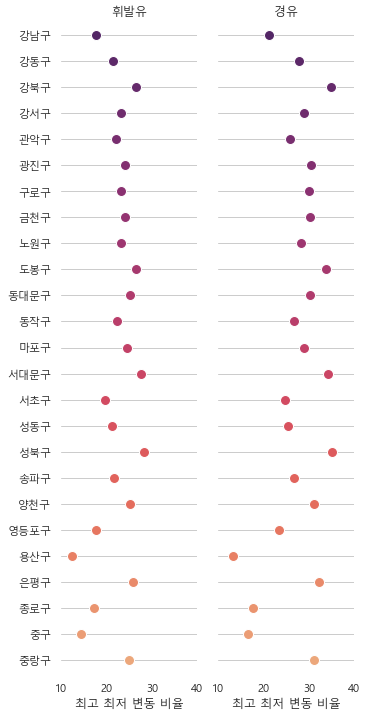

In [28]:
sns.set_theme(style="whitegrid",
                font='Malgun Gothic',
           rc={'axes.unicode_minus':False})

# Load the dataset
crashes = sns.load_dataset("car_crashes")

# Make the PairGrid
g = sns.PairGrid(ratio,
                 x_vars=ratio.columns[1:3], y_vars=["지역"],
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(10, 40), xlabel="최고 최저 변동 비율", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["휘발유", "경유"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

### 결과 도출
    일반적으로 업무지역(ex. 강남, 종로, 용산, 중구)이 가격변동성이 적다는 사실을 알 수 있었다. 주거지역은 비교적 가격변동성이 큰 편이고 30%를 넘어가는 가격변동성을 보여주는 지역도 많았다. 가격이 저렴한 시기에 주거지역에서 주유를 한다면 유류비를 절감할 수 있을 것이다.

## Q4. 알뜰주유소와 알뜰주유소가 아닌 주유소 중 어디가 저렴할까?
    

In [29]:
all_brand = df.groupby('상표').agg(['mean'])
all_brand.drop(['고급휘발유', '실내등유'], axis=1, inplace=True)
all_brand

,휘발유,경유
,mean,mean
상표,,
GS칼텍스,1480.077478,1299.929894
S-OIL,1434.653561,1244.064075
SK에너지,1517.494476,1337.060234
알뜰(ex),1330.236667,1136.860000
알뜰주유소,1355.216043,1161.235468
자가상표,1414.056800,1229.991200
현대오일뱅크,1427.582881,1239.467664


In [30]:
alttel = all_brand.iloc[3:5]
alttel = round(alttel.mean(axis=0), 2)
alttel = pd.DataFrame({
    '유':[alttel['휘발유'].values[0], alttel['경유'].values[0]],
    '유종':['휘발유', '경유'],
    '알뜰':['알뜰', '알뜰']
})
alttel
non_alttel = all_brand.iloc[[0, 1, 2, 5, 6] ,:]
non_alttel = round(non_alttel.mean(axis=0), 2)
non_alttel = pd.DataFrame({
    '유':[non_alttel['휘발유'].values[0],non_alttel['경유'].values[0]],
    '유종':['휘발유', '경유'],
    '알뜰':['알뜰x', '알뜰x']
})
non_alttel


final_data = pd.concat([alttel, non_alttel], ignore_index=True)
# final_data.rename(index={0:'알뜰', 1:'알뜰x'}, inplace=True)
final_data
                

# a = alttel['휘발유'].values
# a

,유,유종,알뜰
0,1342.73,휘발유,알뜰
1,1149.05,경유,알뜰
2,1454.77,휘발유,알뜰x
3,1270.10,경유,알뜰x


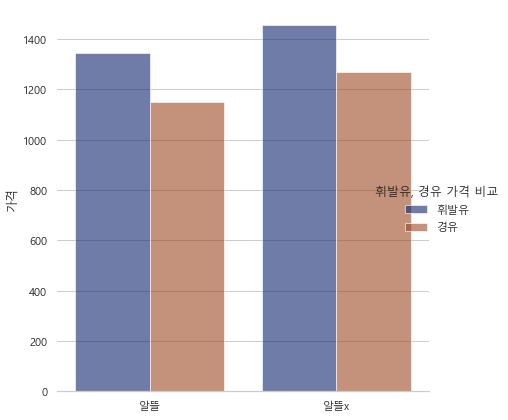

In [31]:
# final_data.plot(kind='bar')
# plt.show()

plt.rc('font', family='Malgun Gothic')


sns.set_theme(style="whitegrid",
                font='Malgun Gothic',
           rc={'axes.unicode_minus':False})
g = sns.catplot(
    data=final_data, kind="bar",
    x="알뜰", y="유", hue="유종",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "가격")
g.legend.set_title("휘발유, 경유 가격 비교")
g

### 결과 도출
    경유, 휘발유 둘 다 알뜰 주유소가 120원 정도 저렴함을 알 수 있다. 유류비를 절감하고자 한다면 알뜰 주유소를 이용하는 것이 도움이 된다

## Q5. 지역별로 가장 저렴한 브랜드, 제일 비싼 브랜드는 무엇일까?
    

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5944 entries, 0 to 5943
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   번호      5944 non-null   object 
 1   지역      5944 non-null   object 
 2   상호      5944 non-null   object 
 3   주소      5944 non-null   object 
 4   기간      5944 non-null   object 
 5   상표      5944 non-null   object 
 6   셀프여부    5944 non-null   object 
 7   고급휘발유   5944 non-null   float64
 8   휘발유     5944 non-null   float64
 9   경유      5944 non-null   float64
 10  실내등유    5944 non-null   float64
 11  시       5944 non-null   object 
 12  구       5944 non-null   object 
dtypes: float64(4), object(9)
memory usage: 603.8+ KB


In [33]:
df['지역'].unique()

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구',
       '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'], dtype=object)

In [34]:
df['시'] = [add.split()[0] for add in df['지역']]
df['구'] = [add.split()[1] for add in df['지역']]
df.loc[df['시']=='서울','시']='서울특별시'
df.head()

IndexError: list index out of range

In [ ]:
df['구'].unique()

In [ ]:
df.drop(['고급휘발유', '실내등유'], axis=1, inplace=True)
df

In [ ]:
region_brand = round(df.pivot_table(index=['구','상표'], values=['휘발유','경유'], aggfunc='mean', margins=True), 2)
region_brand.reset_index(inplace=True)
region_brand

gs = region_brand[region_brand['상표']=='GS칼텍스']
soil = region_brand[region_brand['상표']=='S-OIL']
sk = region_brand[region_brand['상표']=='SK에너지']
hyundai = region_brand[region_brand['상표']=='현대오일뱅크']

gangnam = region_brand[region_brand['구']=='강남구']
jonglo = region_brand[region_brand['구']=='종로구']
seocho = region_brand[region_brand['구']=='서초구']
gangseo = region_brand[region_brand['구']=='강서구']
mapo = region_brand[region_brand['구']=='마포구']
dongdaemun = region_brand[region_brand['구']=='동대문구']

In [ ]:
sns.set_theme(style="whitegrid",
                font='Malgun Gothic',
           rc={'axes.unicode_minus':False})

f, ax = plt.subplots(figsize=(8, 4))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="휘발유", y="상표", data=gangnam,
            label="휘발유", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="경유", y="상표", data=gangnam,
            label="경유", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(1000, 2200), ylabel="가격",
       xlabel="강남구")
sns.despine(left=True, bottom=True)

In [ ]:
sns.set_theme(style="whitegrid",
                font='Malgun Gothic',
           rc={'axes.unicode_minus':False})

f, ax = plt.subplots(figsize=(8, 4))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="휘발유", y="상표", data=jonglo,
            label="휘발유", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="경유", y="상표", data=jonglo,
            label="경유", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(1000, 2200), ylabel="가격",
       xlabel="종로구")
sns.despine(left=True, bottom=True)

In [ ]:
sns.set_theme(style="whitegrid",
                font='Malgun Gothic',
           rc={'axes.unicode_minus':False})

f, ax = plt.subplots(figsize=(8, 4))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="휘발유", y="상표", data=seocho,
            label="휘발유", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="경유", y="상표", data=seocho,
            label="경유", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(1000, 2200), ylabel="가격",
       xlabel="서초구")
sns.despine(left=True, bottom=True)

In [ ]:
sns.set_theme(style="whitegrid",
                font='Malgun Gothic',
           rc={'axes.unicode_minus':False})

f, ax = plt.subplots(figsize=(8, 4))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="휘발유", y="상표", data=gangseo,
            label="휘발유", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="경유", y="상표", data=gangseo,
            label="경유", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(1000, 2200), ylabel="가격",
       xlabel="강서구")
sns.despine(left=True, bottom=True)


In [ ]:
sns.set_theme(style="whitegrid",
                font='Malgun Gothic',
           rc={'axes.unicode_minus':False})

f, ax = plt.subplots(figsize=(8, 4))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="휘발유", y="상표", data=mapo,
            label="휘발유", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="경유", y="상표", data=mapo,
            label="경유", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(1000, 2200), ylabel="가격",
       xlabel="마포구")
sns.despine(left=True, bottom=True)

In [ ]:
sns.set_theme(style="whitegrid",
                font='Malgun Gothic',
           rc={'axes.unicode_minus':False})

f, ax = plt.subplots(figsize=(8, 4))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="휘발유", y="상표", data=dongdaemun,
            label="휘발유", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="경유", y="상표", data=dongdaemun,
            label="경유", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(1000, 2200), ylabel="가격",
       xlabel="동대문구")
sns.despine(left=True, bottom=True)

### 결과 도출
    